In [26]:
import os

import librosa
import librosa.display
import soundfile as sf

import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

import IPython.display as ipd

In [6]:
audio_file_path = os.path.join('.', 'sample_note.wav')

In [8]:
ipd.Audio(audio_file_path)

In [27]:
y, sr = librosa.load(audio_file_path)

# Plotting and visualizing

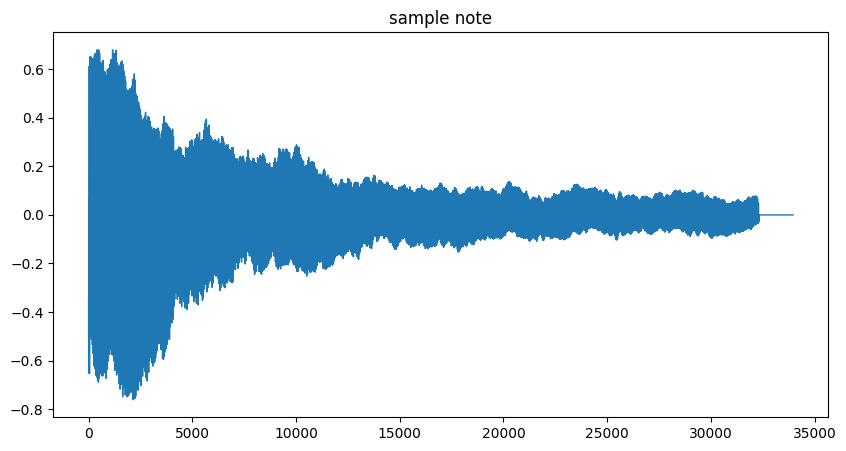

In [30]:
pd.Series(y).plot(figsize = (10, 5), title = 'sample note', lw = 1)
plt.show()

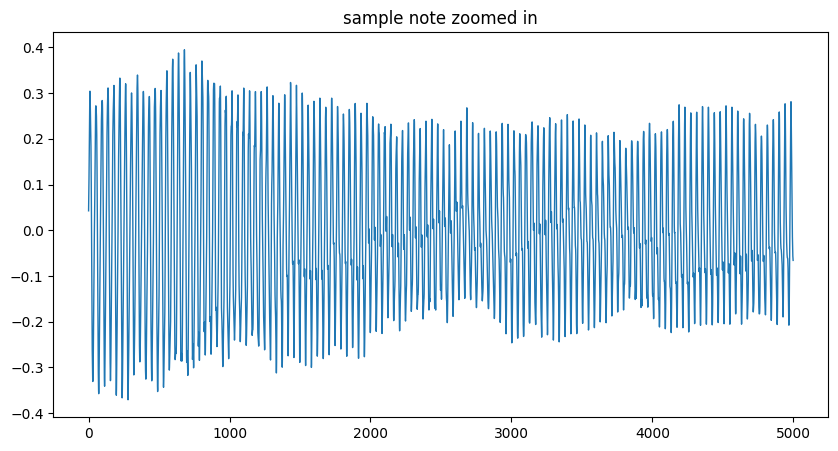

In [36]:
pd.Series(y[5000:10000]).plot(figsize = (10, 5), title = 'sample note zoomed in', lw = 1)
plt.show()

In [12]:
print(f'y: {y[:5]}')
print(f'y.shape: {y.shape}')
print(f'sr: {sr}')

y: [-0.3460831  -0.57889587 -0.57302415 -0.6358716  -0.6336764 ]
y.shape: (33968,)
sr: 22050


# Slowing down/Speeding up the signal

In [13]:
y_streched = librosa.effects.time_stretch(y, rate = 1.5)

In [14]:
print(f'y_streched.shape: {y_streched.shape}')

y_streched.shape: (22645,)


In [18]:
y_streched.shape[0] / y.shape[0]

0.6666568535091851

In [23]:
sf.write('streched.wav', y, sr)
ipd.Audio('streched.wav')

# Short Time Fourier Transform + Plot

In [77]:
y_stft = librosa.stft(y)
y_stft_abs = np.abs(y_stft)
S_db = librosa.amplitude_to_db(np.abs(y_stft), ref=np.max)

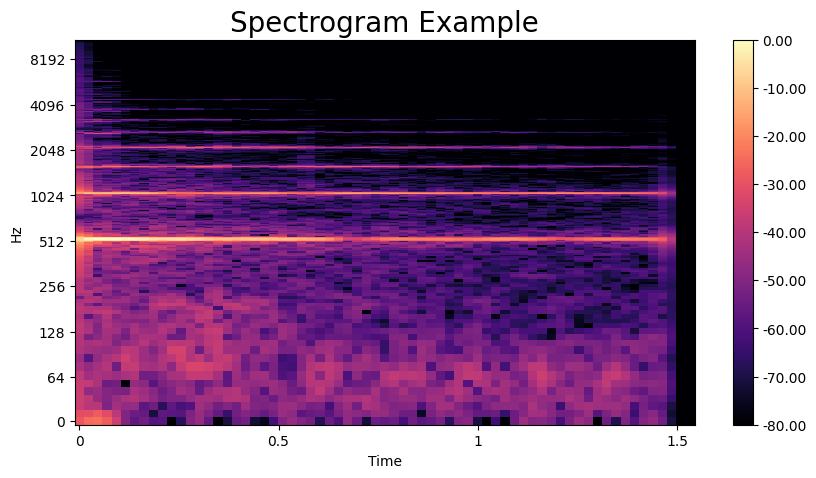

In [78]:
fig, ax = plt.subplots(figsize = (10, 5))
img = librosa.display.specshow(S_db,
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectrogram Example', fontsize = 20)
fig.colorbar(img, ax= ax, format = f'%0.2f')
plt.show()

In [79]:
# y_retrieved = librosa.istft(y_stft_abs)
y_retrieved = librosa.istft(S_db)

In [80]:
sf.write('retrieved.wav', y_retrieved, sr)
ipd.Audio('retrieved.wav')

In [64]:
y_stft.shape

(1025, 67)

In [86]:
y_stft_mul = y_stft * 0.5

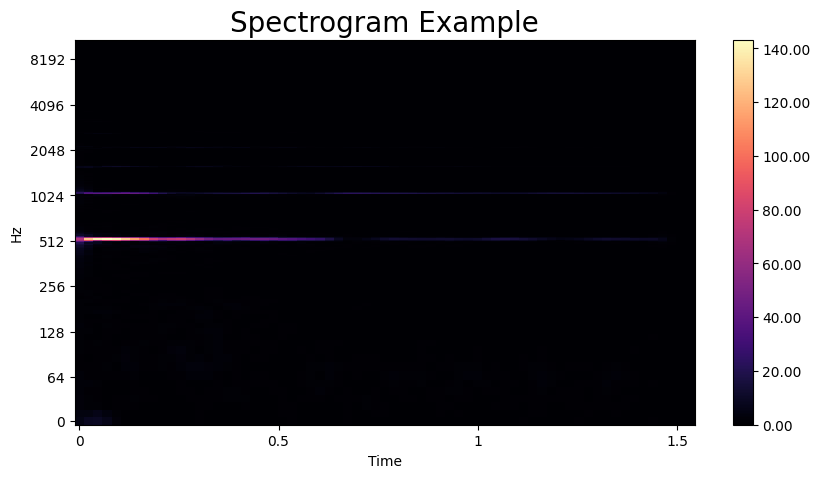

In [87]:
fig, ax = plt.subplots(figsize = (10, 5))
img = librosa.display.specshow(np.abs(y_stft_mul),
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectrogram Example', fontsize = 20)
fig.colorbar(img, ax= ax, format = f'%0.2f')
plt.show()

In [88]:
y_retrieved = librosa.istft(y_stft_mul)
sf.write('retrieved.wav', y_retrieved, sr)
ipd.Audio('retrieved.wav')

In [99]:
def shift_freq(stft, val):
    dim = stft.shape
    result = np.zeros(dim, dtype='complex64')

    for i in range(-val, len(stft)):
        if i + val < 0 or i < 0 or i + val >= len(stft):
            continue
        result[i + val] = stft[i].copy()

    return result

In [156]:
y_stft_shifted = shift_freq(y_stft, -20)
y_shifted = librosa.istft(y_stft_shifted)

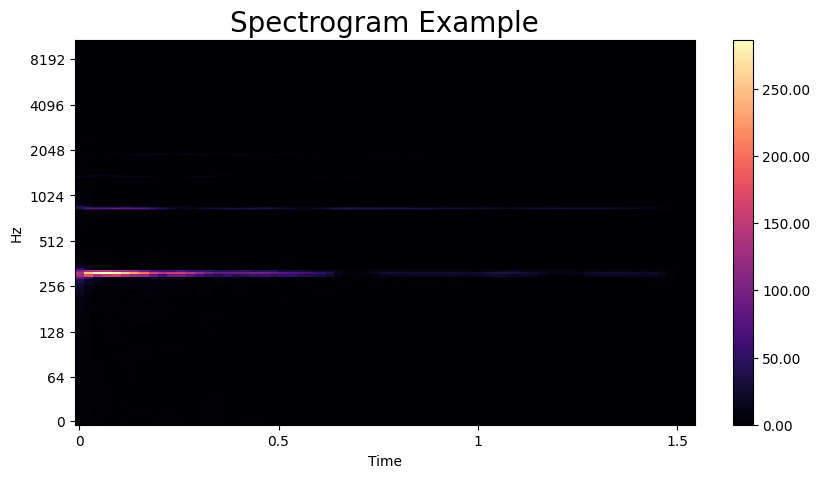

In [157]:
fig, ax = plt.subplots(figsize = (10, 5))
img = librosa.display.specshow(np.abs(y_stft_shifted),
                              x_axis='time',
                              y_axis='log',
                              ax=ax)
ax.set_title('Spectrogram Example', fontsize = 20)
fig.colorbar(img, ax= ax, format = f'%0.2f')
plt.show()

In [158]:
sf.write('shifted.wav', y_shifted, sr)
ipd.Audio('shifted.wav')

# Let's Create Some more notes!

In [161]:
def shift_create_note(input_audio_file, output_audio_file, val):
    y, sr = librosa.load(input_audio_file)
    y_stft = librosa.stft(y)
    y_stft_shifted = shift_freq(y_stft, val)
    y_shifted = librosa.istft(y_stft_shifted)
    sf.write(output_audio_file, y_shifted, sr)

In [166]:
for i in range(8):
    shift_create_note('sample_note.wav', str(i) + '_note.wav', 10 * i - 40)